# Problem Statement
### The Agriculture business domain, as a vital part of the overall supply chain, is expected to highly evolve in the upcoming years via the developments, which are taking place on the side of the Future Internet. The Agriculture business domain, as a vital part of the overall supply chain, is expected to highly evolve in the upcoming years via the developments, which are taking place on the side of the Future Internet. 

### Based on the Information the ultimate goal would be to predict crop production and find important insights highlighting key indicators and metrics that influence crop production.


### Importing necessary libraries

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/Users/manjeetkour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Loading the dataset into dataframe

In [2]:
df=pd.read_csv("Crop Production data.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


### Check the datatypes and transforming which doesnt suit the business needs

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### Handling duplicate and missing values

In [4]:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [5]:
total_missing_values = df.isna().sum().sum() 
print("Total Missing Values:", total_missing_values)

Total Missing Values: 3730


In [6]:
missing_rows = df[df.isnull().any(axis=1)]

# Display rows with missing values
missing_rows

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [7]:
df.fillna(0, inplace=True)
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


### Look into outliers 

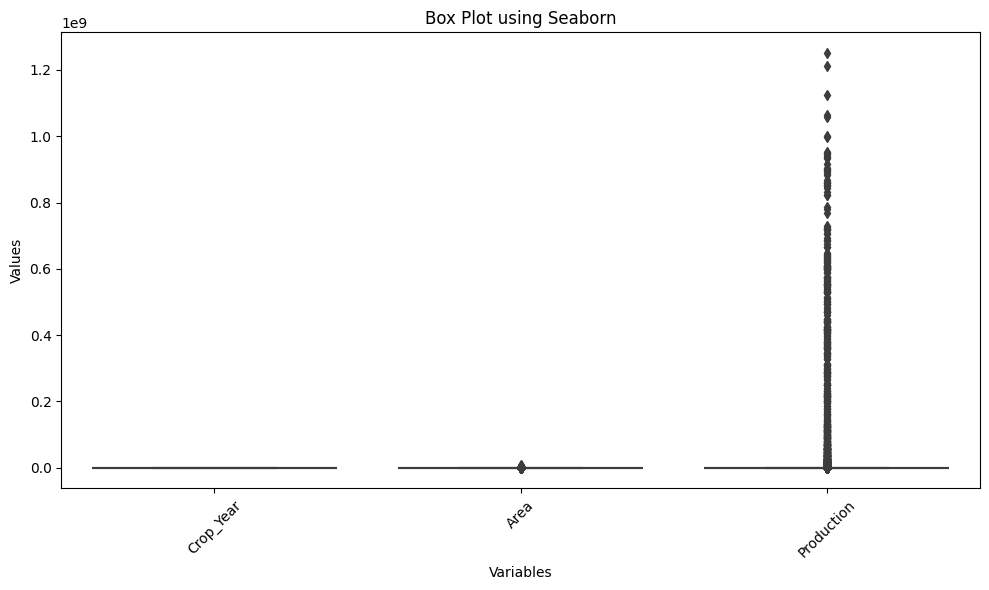

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot using Seaborn')
plt.xticks(rotation=45)  # Optionally, rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data Analysis

### Crop production variability across different seasons 

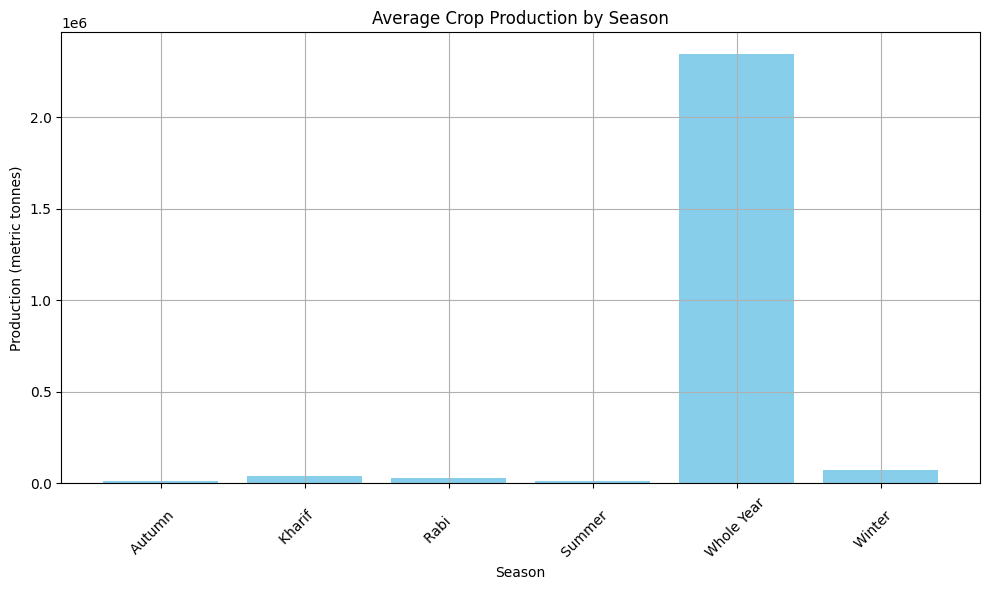

In [9]:
season_production = df.groupby('Season')['Production'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(season_production['Season'], season_production['Production'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Production (metric tonnes)')
plt.title('Average Crop Production by Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Yearly crop production

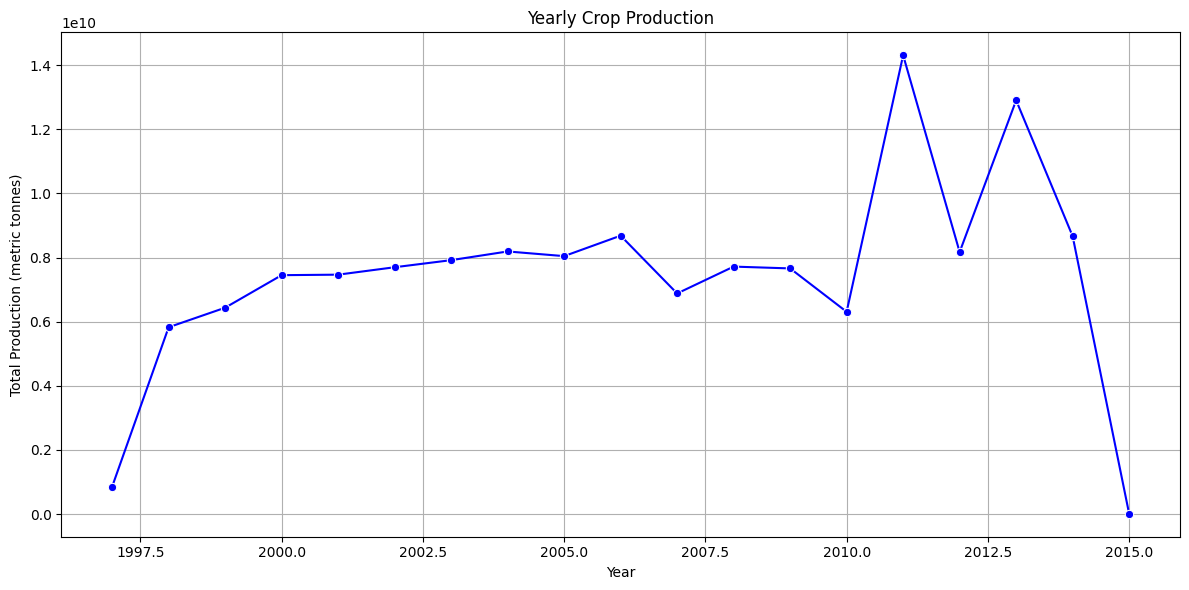

In [10]:
df=pd.read_csv("Crop Production data.csv")
df
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=df, estimator=sum, ci=None, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Production (metric tonnes)')
plt.title('Yearly Crop Production')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 10 States by crop production

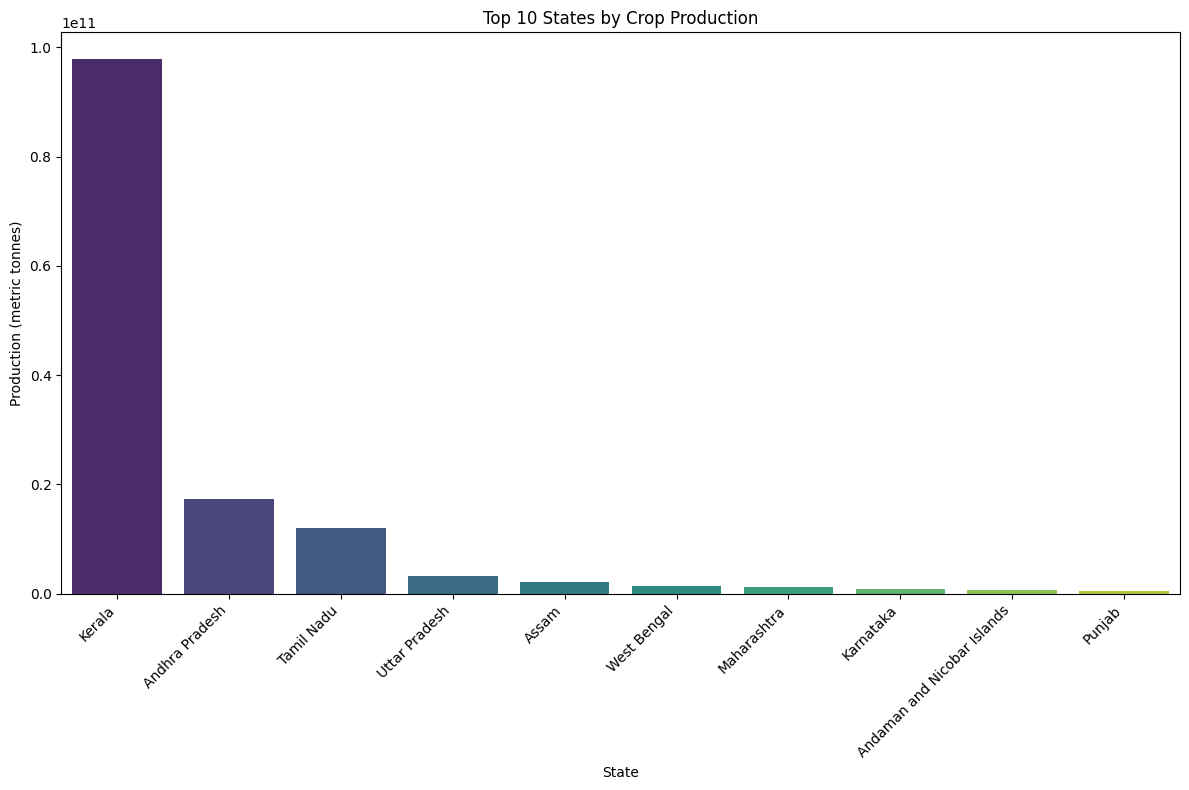

In [11]:
state_production = df.groupby('State_Name')['Production'].sum().reset_index()

# Sort states by production in descending order
top_10_states = state_production.sort_values(by='Production', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='State_Name', y='Production', data=top_10_states, palette='viridis')
plt.xlabel('State')
plt.ylabel('Production (metric tonnes)')
plt.title('Top 10 States by Crop Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualization of Cropwise production

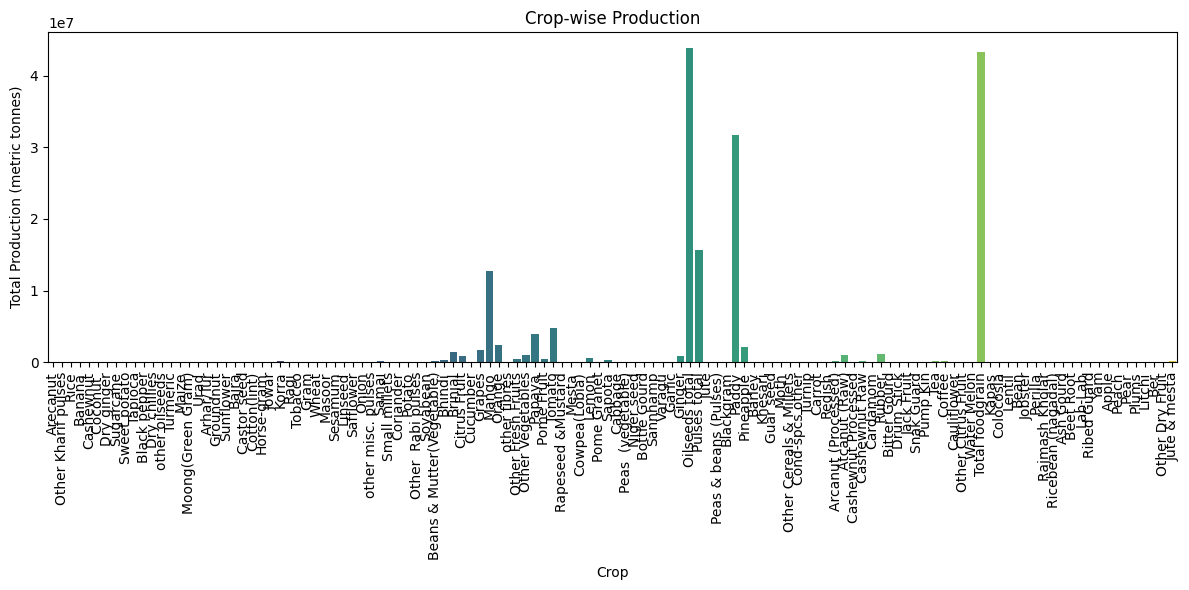

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production', data=df, estimator=sum, ci=None, palette='viridis')
plt.xlabel('Crop')
plt.ylabel('Total Production (metric tonnes)')
plt.title('Crop-wise Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top 10 crops in production

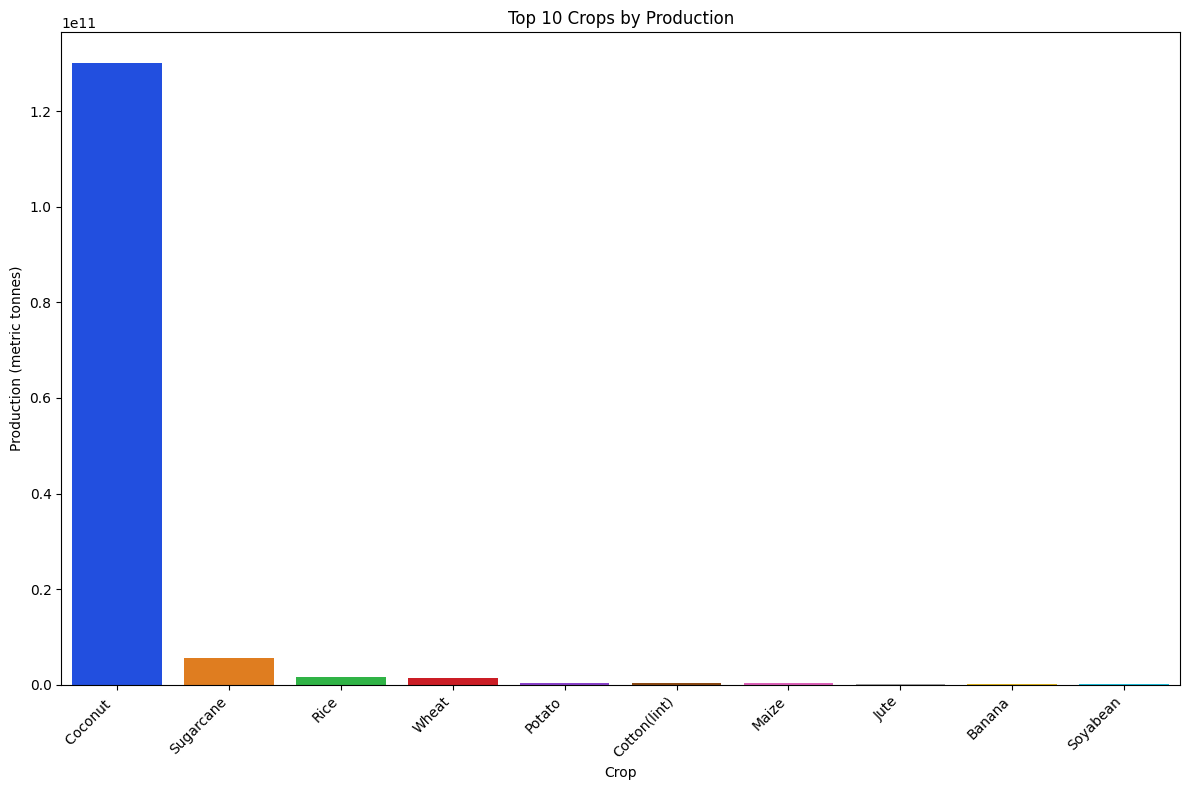

In [13]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()

# Sort crops by production in descending order
top_10_crops = crop_production.sort_values(by='Production', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Production', data=top_10_crops, palette='bright')
plt.xlabel('Crop')
plt.ylabel('Production (metric tonnes)')
plt.title('Top 10 Crops by Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Areawise top 10 crops

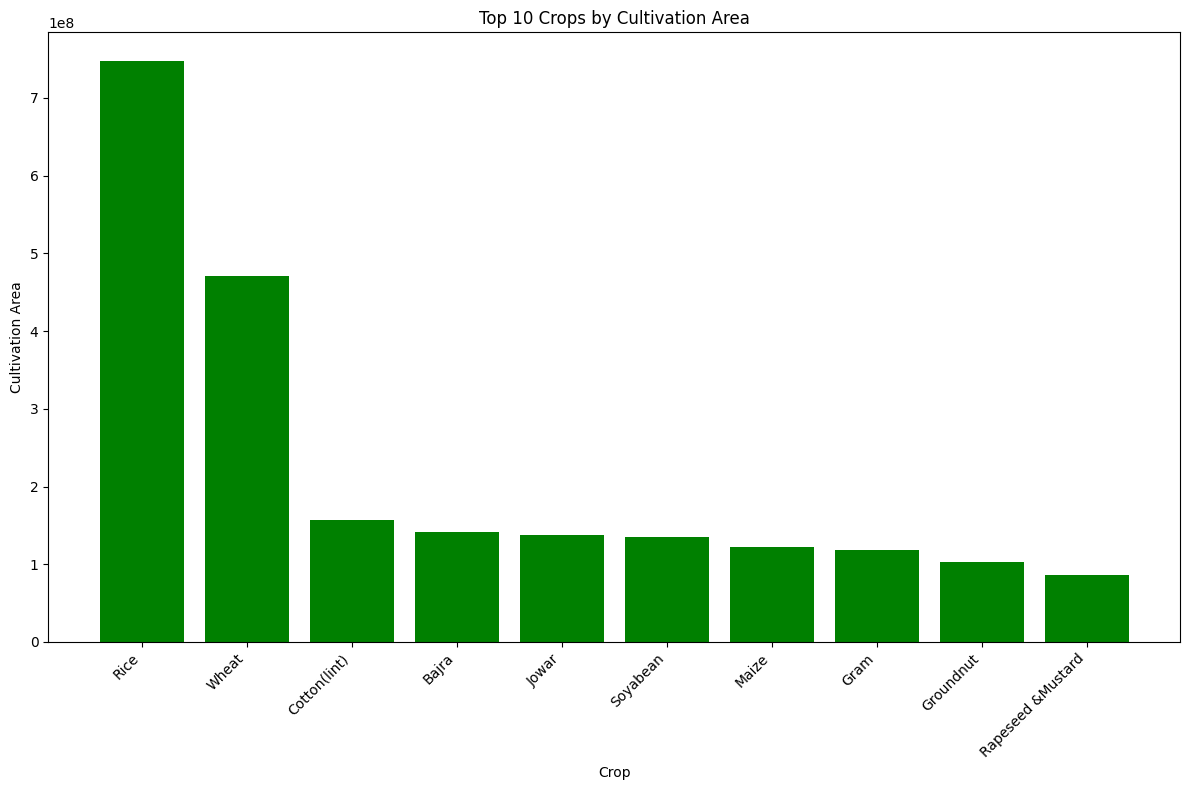

In [14]:
crop_area = df.groupby('Crop')['Area'].sum().reset_index()

# Sort crops by area in descending order
top_10_crops_area = crop_area.sort_values(by='Area', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_10_crops_area['Crop'], top_10_crops_area['Area'], color='green')
plt.xlabel('Crop')
plt.ylabel('Cultivation Area')
plt.title('Top 10 Crops by Cultivation Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()